In [1]:
!git clone https://github.com/garima-mahato/ERA_V1.git

fatal: destination path 'ERA_V1' already exists and is not an empty directory.


In [2]:
from ERA_V1.Session8_BatchNormalizationAndRegularization import *

In [3]:

# # CUDA?

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = set_device()

CUDA Available? True


## Model Architecture

In [5]:
!pip install torchsummary
from torchsummary import summary

model = CIFAR10_Classifier().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 24, 16, 16]           3,456
             ReLU-12           [-1, 24, 16, 16]               0
    

## Dataset Creation

In [5]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768))
    ])

train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

# set seed
torch.manual_seed(1)

batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

Files already downloaded and verified
Files already downloaded and verified


Data Visualization

In [7]:
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

 ship  bird   cat   dog


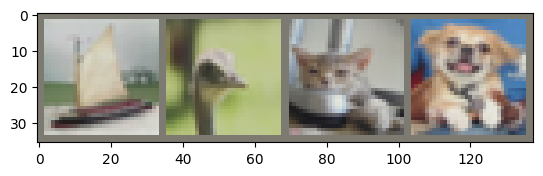

In [8]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % CIFAR10_CLASS_LABELS[labels[j]] for j in range(4)))

## Model Training and Testing

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05

model = CIFAR10_Classifier(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=1.2112 Batch_id=390 Accuracy=49.44: 100%|██████████| 391/391 [00:21<00:00, 17.83it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.4187, Accuracy: 4908/10000 (49.08%)

Epoch 2


Train: Loss=0.8207 Batch_id=390 Accuracy=62.78: 100%|██████████| 391/391 [00:19<00:00, 20.27it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.9953, Accuracy: 6378/10000 (63.78%)

Epoch 3


Train: Loss=0.8988 Batch_id=390 Accuracy=67.42: 100%|██████████| 391/391 [00:18<00:00, 20.71it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.0392, Accuracy: 6375/10000 (63.75%)

Epoch 4


Train: Loss=1.0030 Batch_id=390 Accuracy=70.75: 100%|██████████| 391/391 [00:19<00:00, 19.72it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.8529, Accuracy: 6989/10000 (69.89%)

Epoch 5


Train: Loss=0.6245 Batch_id=390 Accuracy=72.43: 100%|██████████| 391/391 [00:20<00:00, 19.27it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.7671, Accuracy: 7314/10000 (73.14%)

Epoch 6


Train: Loss=0.7977 Batch_id=390 Accuracy=74.34: 100%|██████████| 391/391 [00:20<00:00, 19.40it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.8924, Accuracy: 6906/10000 (69.06%)

Epoch 7


Train: Loss=0.7652 Batch_id=390 Accuracy=75.23: 100%|██████████| 391/391 [00:19<00:00, 19.71it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.7223, Accuracy: 7506/10000 (75.06%)

Epoch 8


Train: Loss=0.7648 Batch_id=390 Accuracy=76.18: 100%|██████████| 391/391 [00:19<00:00, 19.71it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.7115, Accuracy: 7552/10000 (75.52%)

Epoch 9


Train: Loss=0.6539 Batch_id=390 Accuracy=79.76: 100%|██████████| 391/391 [00:19<00:00, 19.92it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.6143, Accuracy: 7865/10000 (78.65%)

Epoch 10


Train: Loss=0.8766 Batch_id=390 Accuracy=80.60: 100%|██████████| 391/391 [00:19<00:00, 19.67it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.6078, Accuracy: 7871/10000 (78.71%)

Epoch 11


Train: Loss=0.5852 Batch_id=390 Accuracy=80.99: 100%|██████████| 391/391 [00:20<00:00, 19.17it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.6078, Accuracy: 7879/10000 (78.79%)

Epoch 12


Train: Loss=0.7320 Batch_id=390 Accuracy=81.28: 100%|██████████| 391/391 [00:20<00:00, 19.20it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.6079, Accuracy: 7862/10000 (78.62%)

Epoch 13


Train: Loss=0.6432 Batch_id=390 Accuracy=81.33: 100%|██████████| 391/391 [00:20<00:00, 19.02it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.5993, Accuracy: 7896/10000 (78.96%)

Epoch 14


Train: Loss=0.6544 Batch_id=390 Accuracy=81.73: 100%|██████████| 391/391 [00:20<00:00, 19.25it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.5973, Accuracy: 7935/10000 (79.35%)

Epoch 15


Train: Loss=0.5268 Batch_id=390 Accuracy=81.69: 100%|██████████| 391/391 [00:20<00:00, 19.43it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.6023, Accuracy: 7891/10000 (78.91%)

Epoch 16


Train: Loss=0.5817 Batch_id=390 Accuracy=81.55: 100%|██████████| 391/391 [00:19<00:00, 19.71it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.6014, Accuracy: 7911/10000 (79.11%)

Epoch 17


Train: Loss=0.4692 Batch_id=390 Accuracy=82.18: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.5913, Accuracy: 7956/10000 (79.56%)

Epoch 18


Train: Loss=0.6526 Batch_id=390 Accuracy=82.40: 100%|██████████| 391/391 [00:20<00:00, 18.86it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.5920, Accuracy: 7941/10000 (79.41%)

Epoch 19


Train: Loss=0.6541 Batch_id=390 Accuracy=82.61: 100%|██████████| 391/391 [00:20<00:00, 18.81it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.5910, Accuracy: 7960/10000 (79.60%)

Epoch 20


Train: Loss=0.6497 Batch_id=390 Accuracy=82.59: 100%|██████████| 391/391 [00:20<00:00, 19.21it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.5914, Accuracy: 7939/10000 (79.39%)



In [7]:
save_network('ERA_V1/Session8_BatchNormalizationAndRegularization/BatchNormalization', 'batch_norm_saved_model', model, train_losses, test_losses, train_acc, test_acc)


 Saving trained model and parameters...


### Accuracy/Loss Visualization

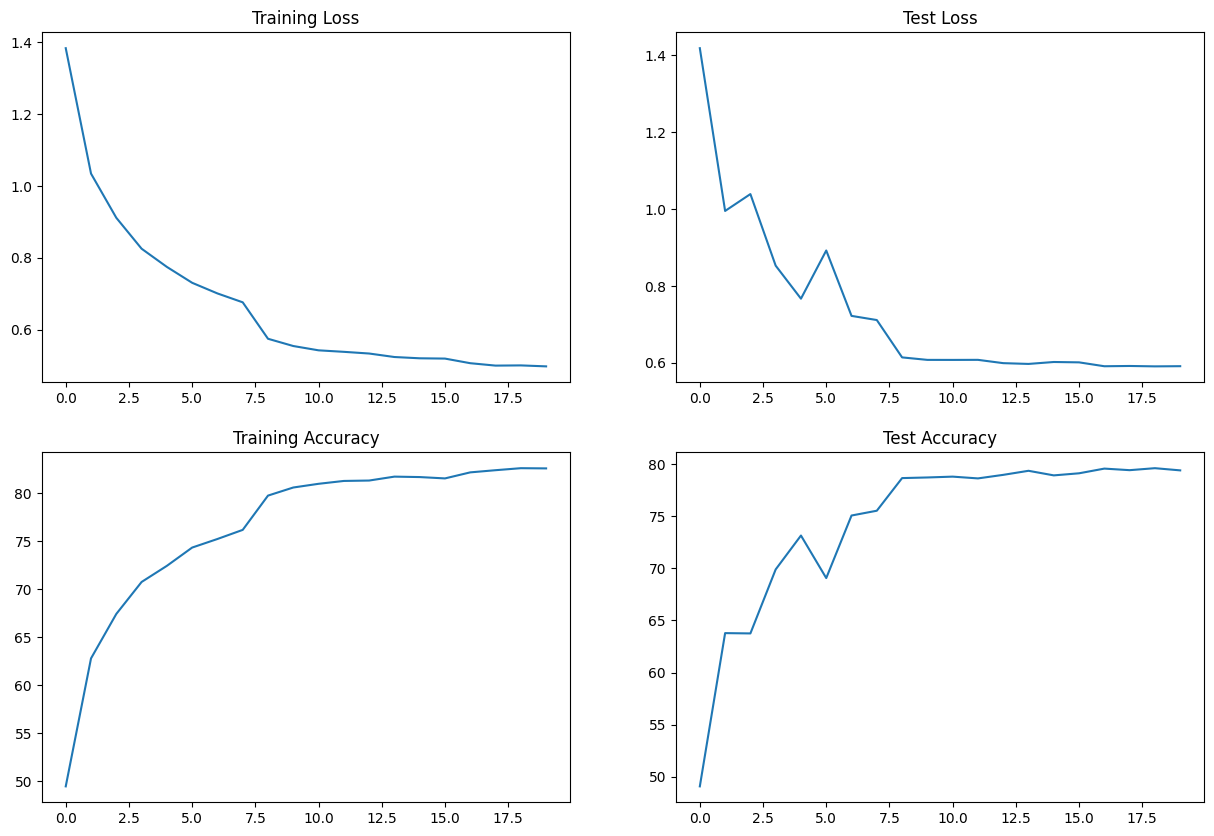

In [8]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)

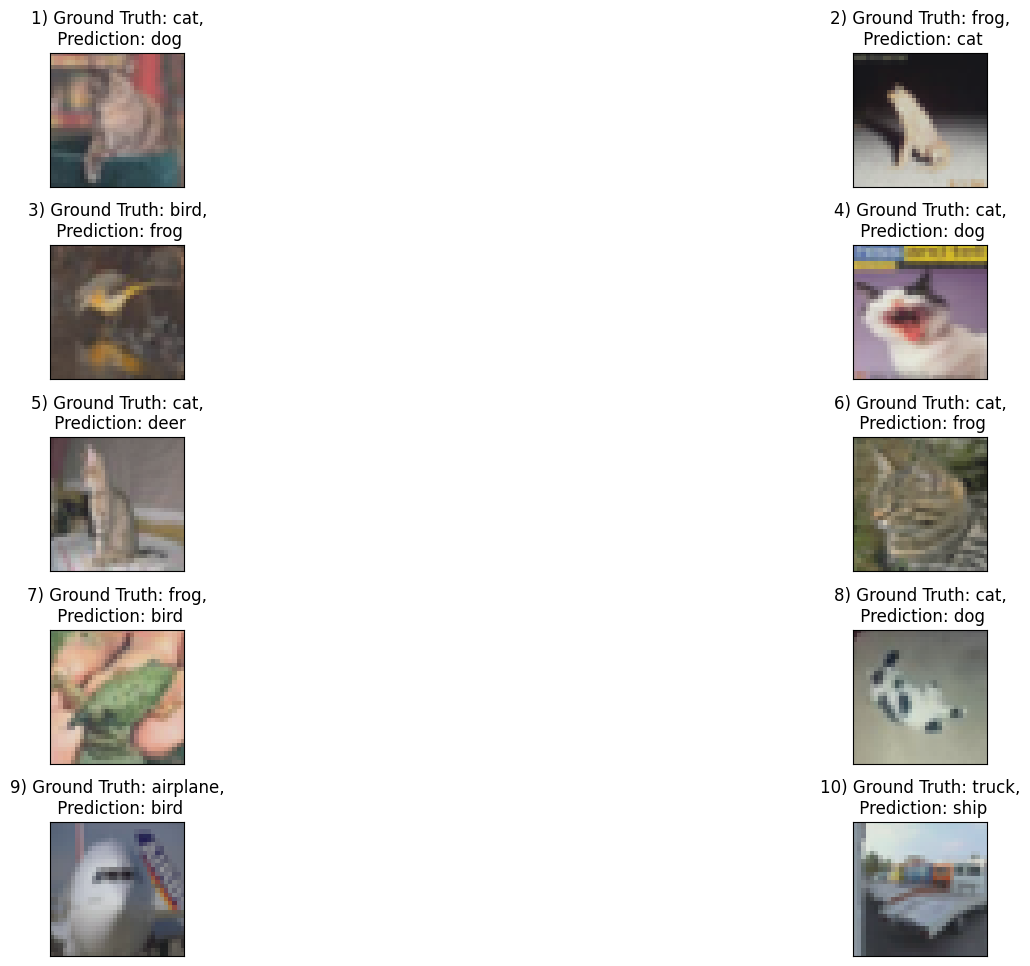

In [10]:
show_save_misclassified_images(model, test_loader, device, 'ERA_V1/Session8_BatchNormalizationAndRegularization/assets', name="cifar10_batch_norm_misclassified_imgs", max_misclassified_imgs=10)

In [11]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-75p6zasz
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-75p6zasz
  Resolved https://github.com/szagoruyko/pytorchviz.git to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=241f7fdf1b167a708bf3a956d1cefacbf94ee2c1bd7d760ed3945d552aa34899
  Stored in directory: /tmp/pip-ephem-wheel-cache-e0ddg9b2/wheels/97/11/17/d09e895f9883bd50923ce86b249a31790356a1b88b280983d8
Successfully built torchviz


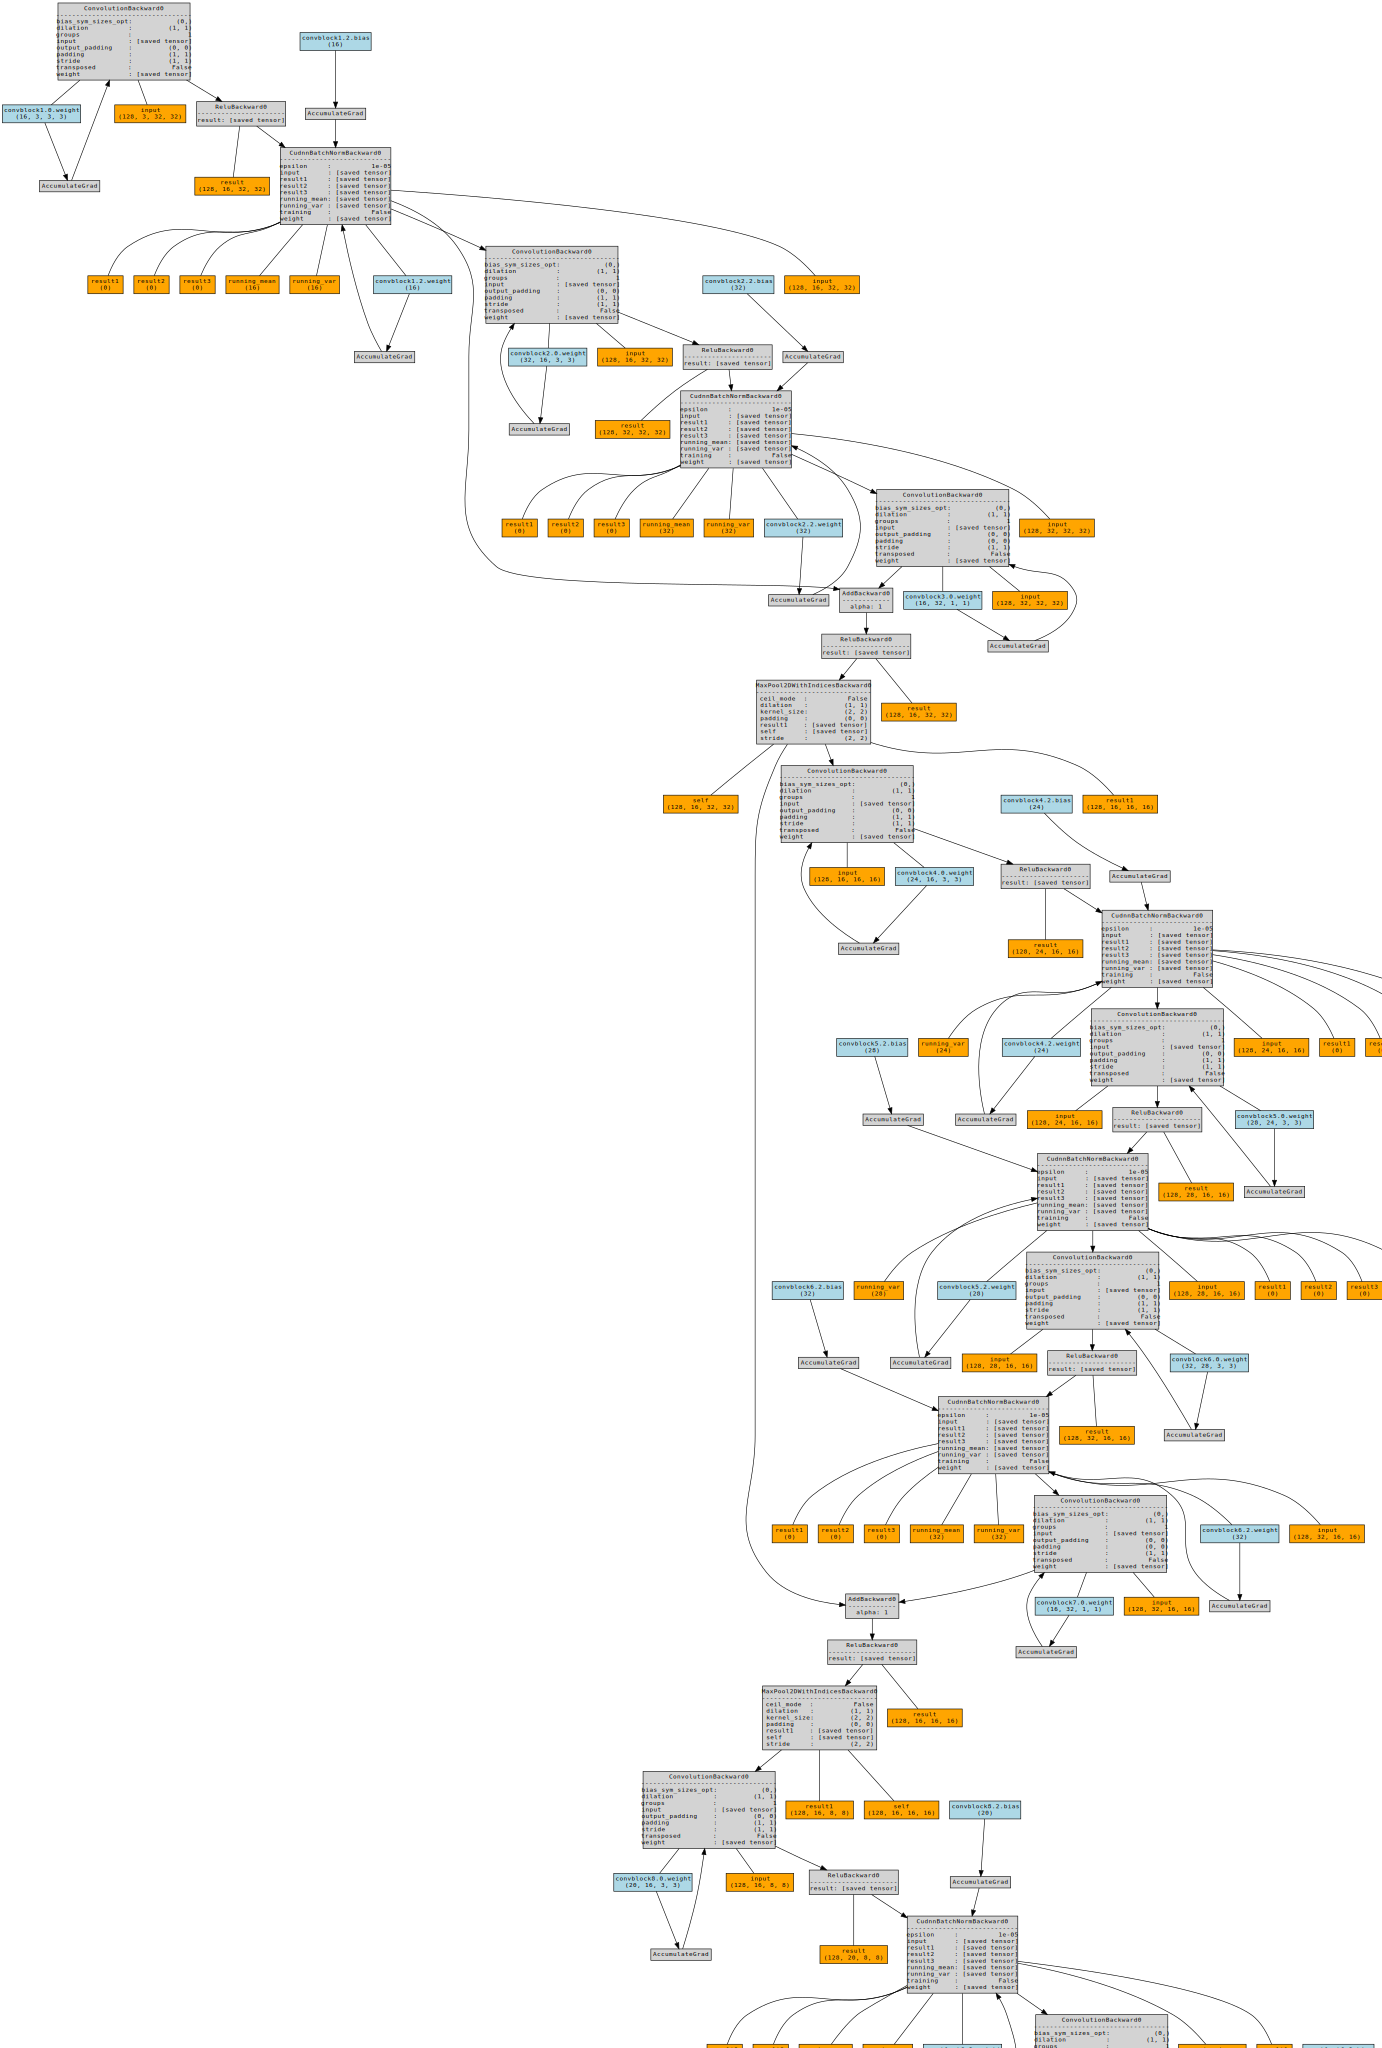

In [12]:
batch_data, batch_label = next(iter(train_loader))
batch_data = batch_data.to(device)
y = model(batch_data)

make_dot(y, params=dict(list(model.named_parameters())), show_attrs=True, show_saved=True)
# .render("mnist_cnn_torchviz", format="png")


In [13]:
make_dot(y, params=dict(list(model.named_parameters())), show_attrs=True, show_saved=True).render("cifar10_bn_torchviz", format="png")

'cifar10_bn_torchviz.png'